In [351]:
import pandas
import matplotlib.pyplot as plt
import numpy
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [352]:
dataframe = pandas.read_csv('./data/healthcare-dataset-stroke-data.csv')

### Trying to find out what the data set contains

In [353]:
print(dataframe.head(20))

       id  gender   age  hypertension  heart_disease ever_married  \
0    9046    Male  67.0             0              1          Yes   
1   51676  Female  61.0             0              0          Yes   
2   31112    Male  80.0             0              1          Yes   
3   60182  Female  49.0             0              0          Yes   
4    1665  Female  79.0             1              0          Yes   
5   56669    Male  81.0             0              0          Yes   
6   53882    Male  74.0             1              1          Yes   
7   10434  Female  69.0             0              0           No   
8   27419  Female  59.0             0              0          Yes   
9   60491  Female  78.0             0              0          Yes   
10  12109  Female  81.0             1              0          Yes   
11  12095  Female  61.0             0              1          Yes   
12  12175  Female  54.0             0              0          Yes   
13   8213    Male  78.0           

In [354]:
dataframe.shape

(5110, 12)

In [355]:
dataframe.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [356]:
dataframe.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### Removing id field as I assume it will not impact the model

In [357]:
del dataframe['id']

### Checking for missing values and filling them with the mean value of column

In [358]:
dataframe.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [359]:
dataframe['bmi'].fillna(28.893237)

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [360]:
dataframe['bmi'].isnull().sum()

201

In [361]:
dataframe['bmi'] = dataframe['bmi'].replace(numpy.NaN, 28.893237)

In [362]:
dataframe['avg_glucose_level'].isna().sum()

0

In [363]:
dataframe['avg_glucose_level'].isnull().sum()

0

### Exploring the numeric fields

<AxesSubplot: ylabel='Frequency'>

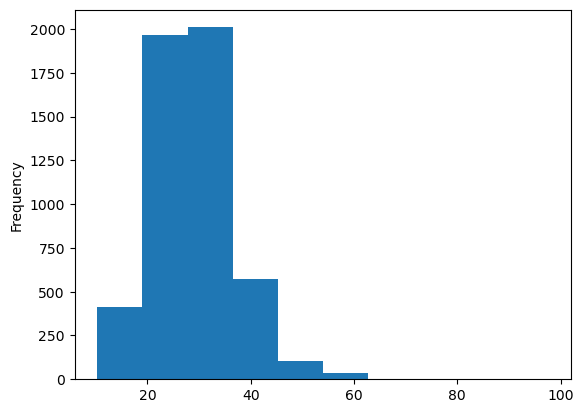

In [364]:
dataframe['bmi'].plot(kind='hist')

<AxesSubplot: ylabel='Frequency'>

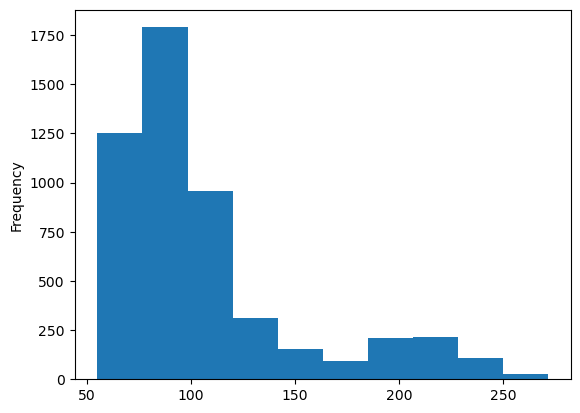

In [365]:
dataframe['avg_glucose_level'].plot(kind='hist')

<AxesSubplot: >

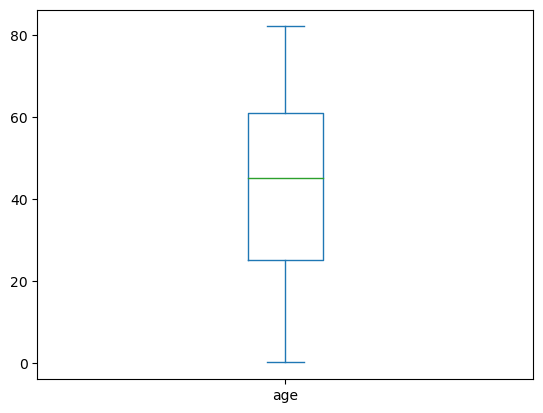

In [366]:
dataframe['age'].plot(kind='box')

<AxesSubplot: >

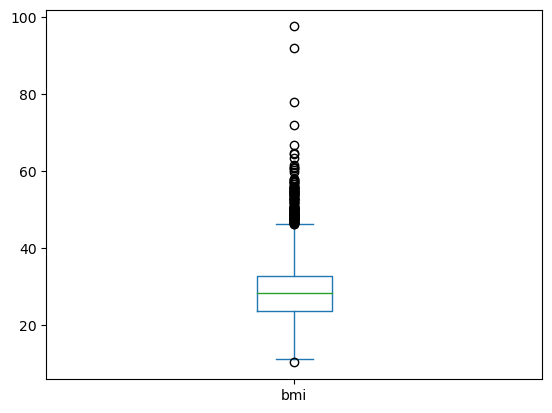

In [367]:
dataframe['bmi'].plot(kind='box')

<AxesSubplot: >

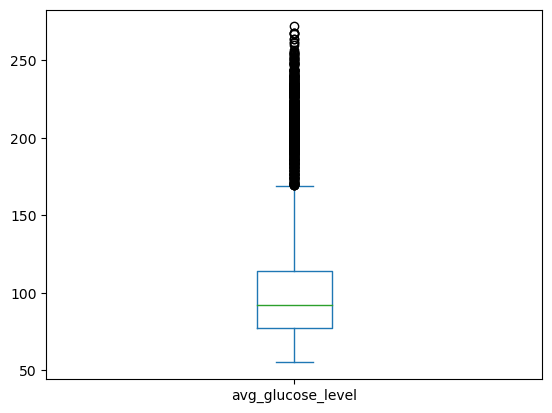

In [368]:
dataframe['avg_glucose_level'].plot(kind='box')

### Trying to find if there is any relations between the fields

In [369]:
dataframe.corr(numeric_only=True)['stroke'].sort_values(ascending=False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.038947
Name: stroke, dtype: float64

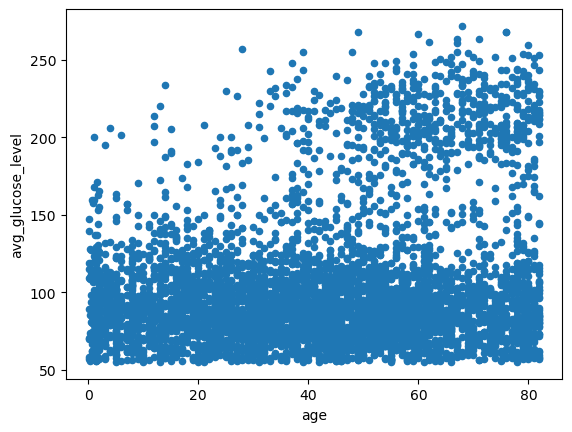

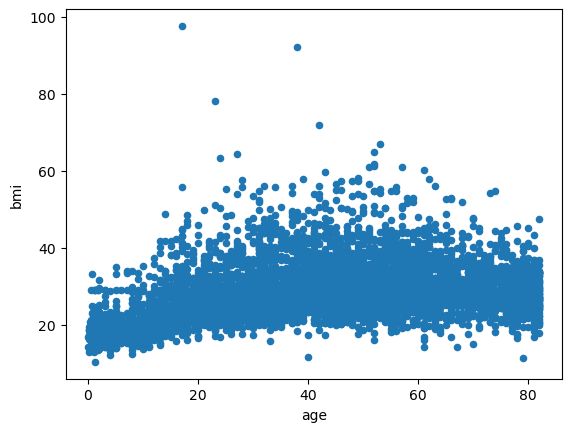

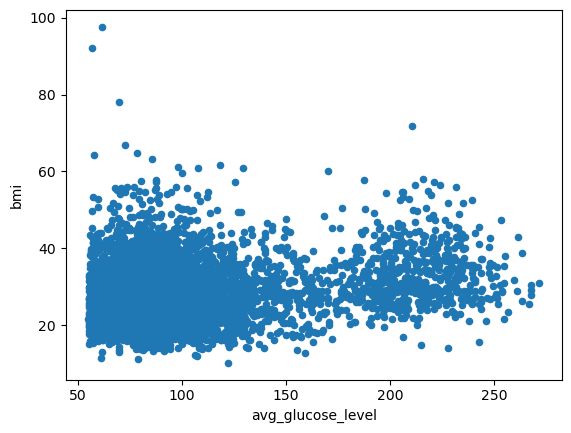

In [370]:
dataframe.plot(kind='scatter', x='age', y='avg_glucose_level')
dataframe.plot(kind='scatter', x='age', y='bmi')
dataframe.plot(kind='scatter', x='avg_glucose_level', y='bmi')
plt.show()

There does not seem to be much of a relationship between the average glucose level, bmi and the age of a person as seen in the graphs above

Exploring categorical data contains and changing unknown data to most frequest

In [371]:
dataframe['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Replacing other with most frequent value due to only 1 value

In [372]:
dataframe['gender'] = dataframe['gender'].replace('Other', 'Female')

In [373]:
dataframe['gender'] = dataframe['gender'].map({
  'Female': 1,
  'Male': 0
})

<AxesSubplot: ylabel='gender'>

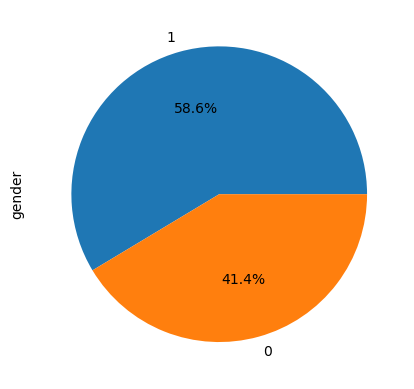

In [374]:
dataframe['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [375]:
dataframe['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot: ylabel='work_type'>

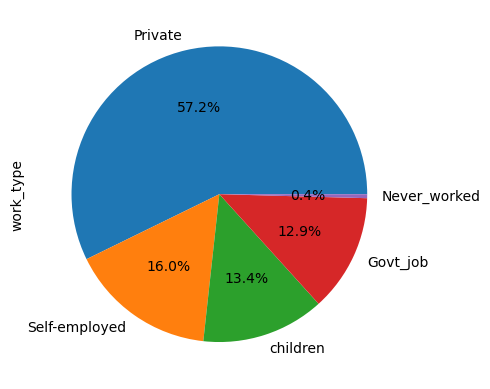

In [376]:
dataframe['work_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot: ylabel='smoking_status'>

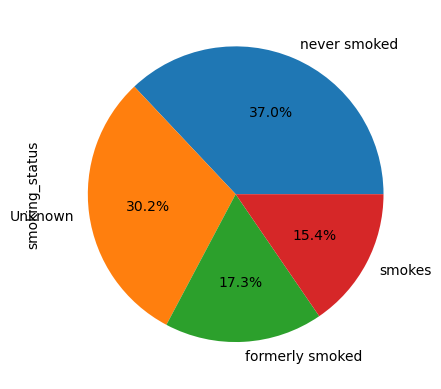

In [377]:
dataframe['smoking_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [378]:
imputer = SimpleImputer(missing_values='Unknown', strategy='most_frequent')
dataframe['smoking_status'] = imputer.fit_transform(dataframe[['smoking_status']])

In [379]:
dataframe['smoking_status'].value_counts()

never smoked       3436
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot: ylabel='smoking_status'>

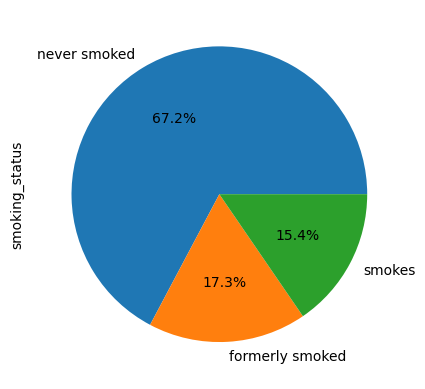

In [380]:
dataframe['smoking_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot: ylabel='Residence_type'>

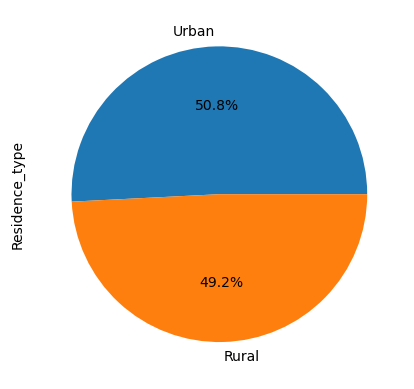

In [381]:
dataframe['Residence_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot: ylabel='ever_married'>

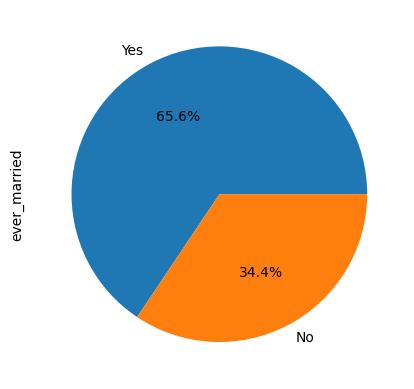

In [382]:
dataframe['ever_married'].value_counts().plot(kind='pie', autopct='%1.1f%%')

Since Yes and No is unreadable by the models I will replace them with 1s and 0s

In [383]:
dataframe['ever_married'] = dataframe['ever_married'].map({
  'Yes': 1,
  'No': 0
})

In [384]:
dataframe['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

<AxesSubplot: ylabel='hypertension'>

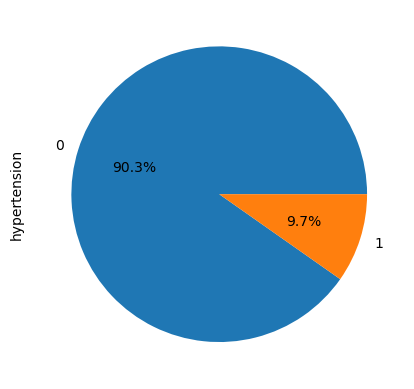

In [385]:
dataframe['hypertension'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot: ylabel='heart_disease'>

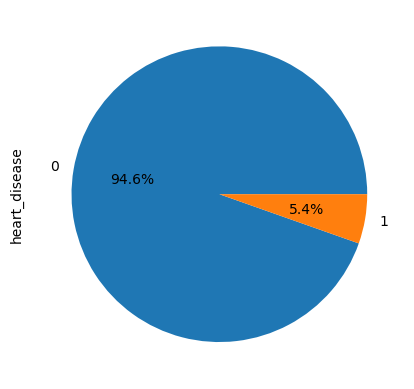

In [386]:
dataframe['heart_disease'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot: ylabel='stroke'>

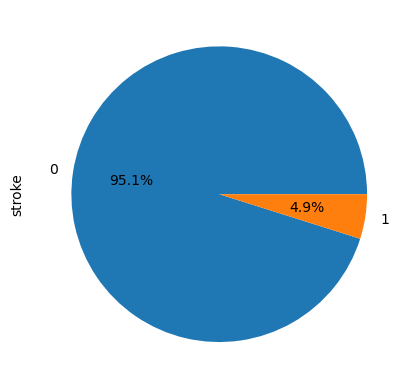

In [387]:
dataframe['stroke'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### Applying one hot encoding to the categorical fields just explored

In [388]:
transformed_categorical_df = pandas.get_dummies(dataframe, columns=["work_type", "smoking_status", 'Residence_type'])
transformed_categorical_df

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban
0,0,67.0,0,1,1,228.69,36.600000,1,0,0,1,0,0,1,0,0,0,1
1,1,61.0,0,0,1,202.21,28.893237,1,0,0,0,1,0,0,1,0,1,0
2,0,80.0,0,1,1,105.92,32.500000,1,0,0,1,0,0,0,1,0,1,0
3,1,49.0,0,0,1,171.23,34.400000,1,0,0,1,0,0,0,0,1,0,1
4,1,79.0,1,0,1,174.12,24.000000,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,83.75,28.893237,0,0,0,1,0,0,0,1,0,0,1
5106,1,81.0,0,0,1,125.20,40.000000,0,0,0,0,1,0,0,1,0,0,1
5107,1,35.0,0,0,1,82.99,30.600000,0,0,0,0,1,0,0,1,0,1,0
5108,0,51.0,0,0,1,166.29,25.600000,0,0,0,1,0,0,1,0,0,1,0


### Storing the cleaned data set as csv to be used for other files

In [389]:
transformed_categorical_df.to_csv('./data/transformed_data.csv', index=False)